In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [3]:
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
from torch.utils.data import DataLoader

In [5]:
train_data = datasets.FashionMNIST('.data',train=True,download=True)

100%|██████████████████████████████████████| 26.4M/26.4M [00:07<00:00, 3.64MB/s]


Extracting .data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|███████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 178kB/s]


Extracting .data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



100%|██████████████████████████████████████| 4.42M/4.42M [00:01<00:00, 2.40MB/s]


Extracting .data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .data/FashionMNIST/raw



100%|██████████████████████████████████████| 5.15k/5.15k [00:00<00:00, 3.05MB/s]

Extracting .data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .data/FashionMNIST/raw



In [6]:
len(train_data)

60000

In [9]:
print(train_data.data.shape)
print(train_data.targets.shape)
print(train_data.classes)
print(train_data.class_to_idx)

torch.Size([60000, 28, 28])
torch.Size([60000])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [10]:
train_data[0][0]

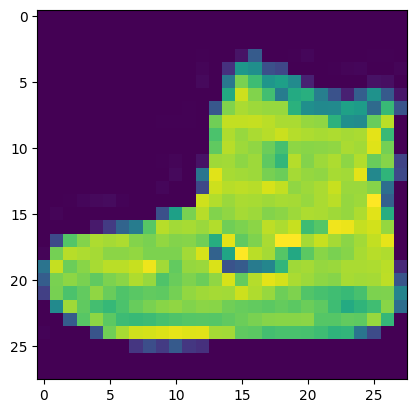

In [11]:
plt.imshow(train_data[0][0]) #1x28x28 image

In [13]:
#Transforms
transform = transforms.ToTensor()
tranform1 = transforms.Compose((transforms.ToTensor(),transforms.Normalize((0.5),(0.5))))

In [14]:
type(train_data.data[0])

torch.Tensor

In [15]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [18]:
train_data = datasets.FashionMNIST('.data',train=True,transform=tranform1)

In [19]:
train_iter = DataLoader(train_data,batch_size=100,shuffle=True)

In [20]:
type(train_iter)

torch.utils.data.dataloader.DataLoader

In [21]:
for features, labels in train_iter:
    print(labels)
    break

tensor([9, 1, 8, 0, 6, 1, 0, 7, 0, 5, 4, 0, 8, 0, 7, 5, 6, 6, 6, 4, 5, 5, 2, 2,
        4, 6, 3, 1, 6, 6, 2, 0, 8, 8, 8, 8, 8, 4, 3, 6, 9, 6, 0, 5, 9, 4, 1, 1,
        6, 8, 7, 9, 3, 7, 8, 2, 1, 1, 1, 4, 9, 8, 0, 2, 9, 6, 4, 3, 4, 0, 9, 7,
        6, 2, 6, 7, 6, 4, 2, 2, 9, 0, 9, 8, 2, 0, 0, 5, 5, 3, 3, 9, 2, 2, 1, 1,
        7, 7, 4, 5])


In [22]:
iterator = iter(train_iter)

In [23]:
feat,lab=next(iterator)

In [24]:
x=feat[0]

In [25]:
x.shape

torch.Size([1, 28, 28])

In [26]:
#for practical purposes we should create the data loader and it should be ok, no need to create iterator
#Lets us Start wuth CNN
conv = nn.Conv2d(1,6,5)#1 input channel, 6 output channels, 5 is filter size

In [27]:
conv.weight.shape

torch.Size([6, 1, 5, 5])

In [28]:
x1 = conv(x)

In [30]:
x1.shape
#1*28*28 after 1st cnn we have 6*24*24

torch.Size([6, 24, 24])

In [31]:
# lets do pooling
pooling = nn.MaxPool2d(2,2)

In [32]:
x2 = pooling(x1)
x2.shape

torch.Size([6, 12, 12])

In [34]:
#simply coding each step in CNN sequentially(not a good practice)
x = feat[0]
x = nn.Conv2d(1,6,5)(x)
x = nn.MaxPool2d(2,2)(x)
x = nn.Conv2d(6,6,5)(x)
x = nn.MaxPool2d(2,2)(x)
x.shape

torch.Size([6, 4, 4])

In [36]:
F.relu(x)

tensor([[[0.0000, 0.0000, 0.2608, 0.0748],
         [0.0000, 0.2371, 0.1794, 0.1389],
         [0.2000, 0.2642, 0.1394, 0.2868],
         [0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0149, 0.0000, 0.0000, 0.0151],
         [0.0326, 0.0000, 0.0576, 0.0269],
         [0.0000, 0.0000, 0.0042, 0.0000],
         [0.0000, 0.0268, 0.0806, 0.0000]],

        [[0.4732, 0.4837, 0.3244, 0.0589],
         [0.4818, 0.3454, 0.0118, 0.0000],
         [0.2670, 0.1919, 0.0000, 0.0000],
         [0.1969, 0.0599, 0.1079, 0.0000]],

        [[0.1688, 0.1425, 0.2039, 0.2201],
         [0.1258, 0.2087, 0.2107, 0.1122],
         [0.1729, 0.2637, 0.1399, 0.1014],
         [0.3258, 0.1063, 0.2120, 0.0892]],

        [[0.1309, 0.1839, 0.2193, 0.1304],
         [0.2198, 0.2399, 0.0000, 0.1027],
         [0.0962, 0.0463, 0.0000, 0.2294],
         [0.3038, 0.3238, 0.4699, 0.2551]],

        [[0.0000, 0.0000, 0.0000, 0.1749],
         [0.0000, 0.0594, 0.0587, 0.2764],
         [0.0675, 0.2820, 0.1616, 0.1569],
 

In [37]:
#Actual CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,6,5)
        self.fc1 = nn.Linear(6*4*4,80)
        self.fc2 = nn.Linear(80,20)
        self.fc3 = nn.Linear(20,10)
        # these above are the components of your model
        # the forward pass will define the architecture of the model

    def forward(self,x): #1x28x28
        x = self.conv1(x) #6x24x24
        x = F.relu(x)
        x = self.pool(x) #6x12x12
        x = self.conv2(x)#6x8x8
        x = F.relu(x)
        x = self.pool(x)#6x4x4
        x = x.view(-1,6*4*4) #x.flatten()
        x = self.fc1(x) #1x80
        x = F.relu(x)
        x = self.fc2(x) #1x20
        x = F.relu(x)
        x = self.fc3(x) #1x10 (10 is the no.of classes)
        return x

In [38]:
Model = CNN()

In [39]:
x = feat[0]

In [40]:
out = Model(feat)
out.shape

torch.Size([100, 10])

In [43]:
#Training starts now
Loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(Model.parameters(),lr=0.1,momentum=0.9)

In [47]:
# 1 epoch means go over all the data points once
# 1 iteration means go over 1 batch(100 points)
for epoch in range(5): #will run 600 x 3 times
    #Here eopch starts so referesh all counters
    total_correct_pts = 0

    for features,labels in train_iter: # will run for 600 batches
        optimizer.zero_grad() #in order to remove any previous gradient info

        output = Model(features) #forward pass  100x10 max along column dim

        ls = Loss(output,labels)# compute the loss
        ls.backward() #backprop the loss
        optimizer.step() #update the params

        corr = torch.argmax(output,axis=1)==torch.as_tensor(labels) #no.of correct prediction
                                                            # take the max among output column that si 10 dim, and compare its label to the correct one
        
        total_correct = torch.count_nonzero(corr)
        total_correct_pts += total_correct
        
    print("Accuracy",total_correct_pts/60000)
    

Accuracy tensor(0.4968)
Accuracy tensor(0.5496)
Accuracy tensor(0.4324)
Accuracy tensor(0.3886)
Accuracy tensor(0.1851)


In [50]:
output.shape

torch.Size([100, 10])

In [49]:
test_data = datasets.FashionMNIST('.data',train=False,download=True,transform=tranform1)

In [51]:
test_iter = DataLoader(test_data,batch_size=100,shuffle=False)

In [52]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [54]:
Model.eval()

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=96, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=10, bias=True)
)

In [58]:
test_corr = 0
for data in test_iter:
    feat,lab = data
    test_out = Model(feat)

    curr_classes = torch.argmax(test_out,axis=1)==torch.as_tensor(lab)
    tcd = torch.count_nonzero(curr_classes)
    test_corr += tcd
print(test_corr/10000)

tensor(0.1553)


In [59]:
#Many other Pre-defined Models
from torchvision import models

In [62]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
